In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimise

In [2]:
def lorentz(x, A, M, G):
    return A/(1 + (2*(x - M)/G)**2 );

def spectrum_steel(x, B, A, x0, G):
    return B - lorentz(x, A, x0, G);

def spectrum_np(x, B, A, x0, G, S):
    return B - lorentz(x, A, (x0-S/2), G) - lorentz(x, A, (x0+S/2), G);

def spectrum_iron(x, B, A1, A2, A3, x01, x02, x03, G1, G2, G3, S1, S2, S3):
    return B - lorentz(x, A1, (x01-S1/2), G1) - lorentz(x, A1, (x01+S1/2), G1) - lorentz(x, A2, (x02-S2/2), G2) - lorentz(x, A2, (x02+S2/2), G2) - lorentz(x, A3, (x03-S3/2), G3) - lorentz(x, A3, (x03+S3/2), G3)

In [3]:
param0_steel = np.array([1170., 350., 249., 23.27]);
param0_np = np.array([2620., 385., 243.5, 15., 60.]);
param0_iron = np.array([62000., 8400., 7800., 4600., 253., 253., 253., 20., 20., 20., 366., 212., 60.])

In [4]:
steel_data = np.loadtxt('ss.dat')
iron_data = np.loadtxt('ci.dat')
np_data = np.loadtxt('np.dat')

steel_folded = steel_data[1:511, 1] + steel_data[1022:512:-1, 1];
iron_folded = iron_data[1:511, 1] + iron_data[1022:512:-1, 1];
np_folded = np_data[1:511, 1] + np_data[1022:512:-1, 1];
channel = np.array(np.linspace(1, 510, 510))

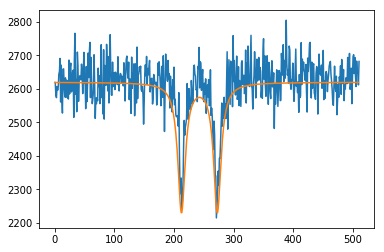

In [5]:
plt.plot(channel, np_folded[:])
plt.plot(spectrum_np(channel, *param0_np))

In [6]:
param_steel, cov_steel = optimise.curve_fit(spectrum_steel, channel, steel_folded, p0=param0_steel)
param_iron, cov_iron = optimise.curve_fit(spectrum_iron, channel, iron_folded, p0=param0_iron)
param_np, cov_np = optimise.curve_fit(spectrum_np, channel, np_folded, p0=param0_np)

steel_err = np.sqrt(np.diag(cov_steel))
iron_err = np.sqrt(np.diag(cov_iron))
np_err = np.sqrt(np.diag(cov_np))

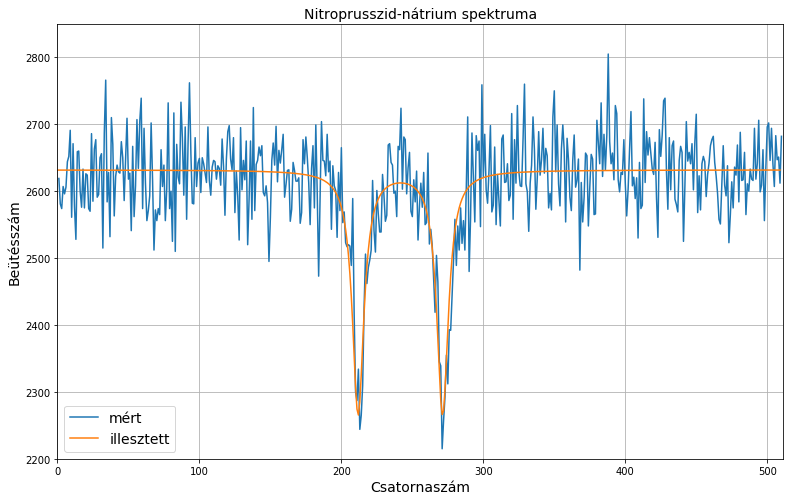

In [7]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
plt.ylim(2200,2850)
plt.title('Nitroprusszid-nátrium spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)


plt.plot(channel, np_folded[:], label= 'mért')
plt.plot(spectrum_np(channel, *param_np),  label= 'illesztett')

plt.legend(fontsize = 14, loc='lower left')
plt.savefig('np.png')


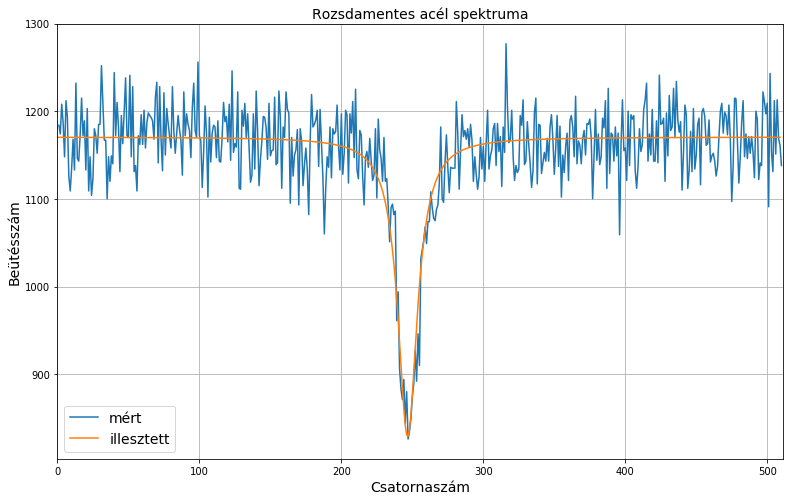

In [8]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
#plt.ylim(2200,2850)
plt.title('Rozsdamentes acél spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)

plt.plot(channel, steel_folded[:], label = 'mért')
plt.plot(spectrum_steel(channel, *param_steel), label = 'illesztett')

plt.legend(fontsize = 14, loc='lower left')
plt.savefig('acel.png')

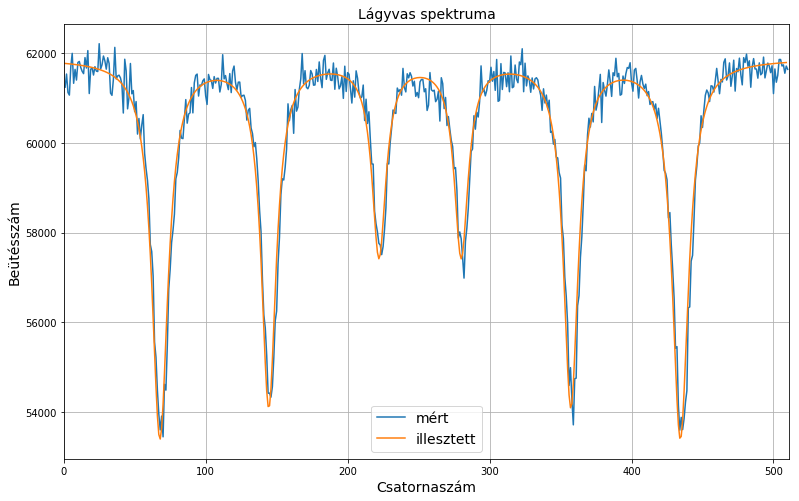

In [9]:
plt.figure(figsize=(13,8))
plt.xlim(0,511)
#plt.ylim(2200,2850)
plt.title('Lágyvas spektruma', fontsize = 14)
plt.xlabel('Csatornaszám', fontsize = 14)
plt.ylabel('Beütésszám', fontsize = 14)
plt.grid(True)

plt.plot(channel, iron_folded[:], label='mért')
plt.plot(spectrum_iron(channel, *param_iron), label='illesztett')


plt.legend(fontsize = 14, loc='lower center')
plt.savefig('vas.png')

In [10]:
print(param_steel)
print(steel_err)

[1170.58065589  342.02897203  247.64755396   16.57003278]
[ 1.66428926 13.2806942   0.32165614  0.95882028]


In [11]:
print(param_iron)
print(iron_err)

[6.18826434e+04 8.41816161e+03 7.68189264e+03 4.32747415e+03
 2.52087594e+02 2.51860372e+02 2.52060546e+02 1.38572113e+01
 1.26167139e+01 1.18886190e+01 3.66608620e+02 2.12801488e+02
 5.79151315e+01]
[2.18120794e+01 8.25382711e+01 8.64972657e+01 8.93371692e+01
 6.77350436e-02 7.08278140e-02 1.22329338e-01 2.20539311e-01
 2.25113194e-01 3.66893384e-01 1.35491721e-01 1.41677053e-01
 2.43609288e-01]


In [12]:
print(param_np)
print(np_err)

[2631.85102623  364.53528678  242.55469426    9.86394921   59.50942164]
[ 2.58445566 18.66545797  0.25243739  0.72948534  0.50387927]


In [13]:
print('First iron peak w err: ', param_iron[4] - param_iron[10]/2., 'pm', np.sqrt(iron_err[4]**2 + (iron_err[10]/2.)**2))
print('Last iron peak w err: ', param_iron[4] + param_iron[10]/2., 'pm', np.sqrt(iron_err[4]**2 + (iron_err[10]/2.)**2))

First iron peak w err:  68.7832838902502 pm 0.09579946647208767
Last iron peak w err:  435.391903872336 pm 0.09579946647208767


In [14]:
c = 299792458
deltaV = 0.0106162
deltaCh = param_iron[10]

relErrDeltaCh = iron_err[10]/param_iron[10]

gammaE = 14.4

deltaE = gammaE * deltaV/(deltaCh*c)
deltaEerr = deltaE*relErrDeltaCh

print('A kiszélesedés a Doppler-effektusnak köszönhetően: (v ~ ch öf. meredeksége) ', deltaE, 'pm', deltaEerr, ' keV')

A kiszélesedés a Doppler-effektusnak köszönhetően: (v ~ ch öf. meredeksége)  1.3909393981425074e-12 pm 5.14065308884068e-16  keV


In [15]:
ironPeak = (param_iron[4] + param_iron[5] + param_iron[6])/3
ironPeakErr = np.sqrt (iron_err[4]**2 + iron_err[5]**2 + iron_err[6]**2)

print('Csúcs átlag, lágyvas: ', ironPeak, 'pm', ironPeakErr)
print('Csúcs np: ', param_np[2], 'pm', np_err[2])
print('Csúcs acél', param_steel[2], 'pm', steel_err[2])

Csúcs átlag, lágyvas:  252.00283716360255 pm 0.15674527831201718
Csúcs np:  242.55469425663605 pm 0.25243738727571474
Csúcs acél 247.64755396414535 pm 0.321656139883312


In [16]:
print('energia eltolódás vas-acél: ', deltaE*(ironPeak - param_steel[2]), 'pm',
      deltaE*(ironPeak - param_steel[2])*(deltaEerr/deltaE + np.sqrt(ironPeakErr**2 + steel_err[2]**2)/(ironPeak-param_steel[2])),
     'keV')
print('energia eltolódás vas-nitroprusszid: ', deltaE*(ironPeak - param_np[2]), 'pm',
      deltaE*(ironPeak - param_np[2])*(deltaEerr/deltaE + np.sqrt(ironPeakErr**2 + np_err[2]**2)/(ironPeak-param_np[2])),
     'keV')

energia eltolódás vas-acél:  6.057934992193178e-12 pm 4.99938231332227e-13 keV
energia eltolódás vas-nitroprusszid:  1.3141794208580378e-11 pm 4.181642930612485e-13 keV


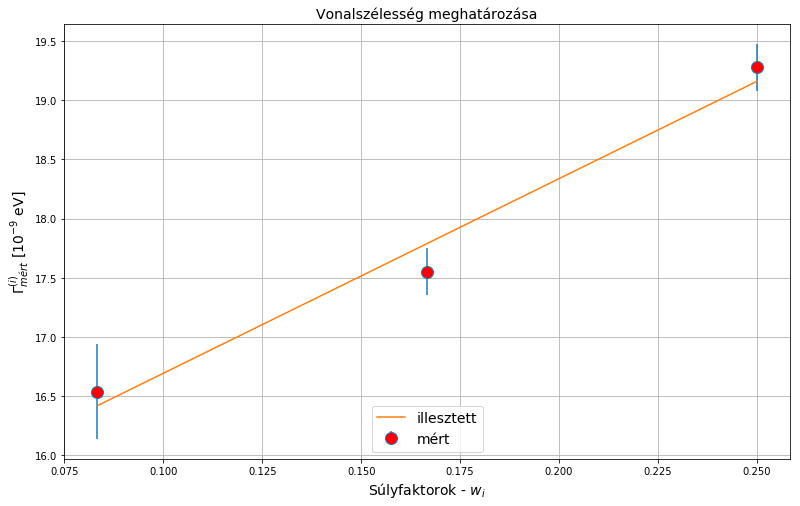

In [19]:
def linearFunc(x, m, B):
    return m*x+B

gammaMeasured = np.array([13.86, 12.62, 11.89])
gammaMeasured *= deltaE*10**12
gammaErr = np.array([0.2, 0.2, 0.4])
gammeErr = gammaErr*deltaE*10**12

weight = [0.25, 1./6., 1./12.]

linearParams, linearCov  = optimise.curve_fit(linearFunc, weight, gammaMeasured, [32.3, 342.1])
linearErr = np.sqrt(np.diag(linearCov))

plt.figure(figsize=(13,8))
plt.title('Vonalszélesség meghatározása', fontsize = 14)
plt.xlabel('Súlyfaktorok - $w_{i}$', fontsize = 14)
plt.ylabel('$\Gamma_{mért}^{ (i)}$ [$10^{-9}$ eV]', fontsize = 14)
plt.grid(True)

values = []
for i in range(0, len(weight)):
    values.append(linearFunc(weight[i], *linearParams))

plt.errorbar(weight, gammaMeasured, gammaErr, marker='o', mfc='red', ms=12, ls='None', label='mért')
plt.plot(weight, values, label='illesztett')

plt.legend(fontsize = 14, loc='lower center')
plt.savefig('vonalszelesseg.png')

In [20]:
print(linearParams)
print(linearErr)

# Gamma_measured = 2.4Gamma + 1/4 * T_A * w_i * Gamma = B + m * w_i

gamma = linearParams[1]/2.4
gammaErr =  linearErr[1]/2.4

tau = 6.626*10**(-34)/(2*3.14159*gamma*10**(-9)*1.6*10**(-19))
tauErr = tau*gammaErr/gamma

print('gamma: ', gamma, 'pm', gammaErr , '10**-9 eV')
print('tau = h/(2*pi*gamma): ', tau, 'pm', tauErr, 's')

[16.44090369 15.04996429]
[2.45736119 0.44237558]
gamma:  6.270818453292463 pm 0.18432315953352607 10**-9 eV
tau = h/(2*pi*gamma):  1.0510605110119591e-07 pm 3.089465843950996e-09 s


In [21]:
energyQuad = deltaE*param_np[4]
energyQuadErr = deltaE*param_np[4]*(deltaEerr/deltaE + np_err[4]/param_np[4])

print('deltaE a kvadrupol miatt: ', energyQuad, 'pm', energyQuadErr, 'keV')

d2Vdz2 = energyQuad*10**3*4*(3./2.)*(2*(3./2.) - 1.)/(6*0.21*10**(-28))

print('d^2V/dz^2: ', d2Vdz2, 'pm', d2Vdz2*energyQuadErr/energyQuad, 'V/m^2')

deltaE a kvadrupol miatt:  8.277399912583315e-11 pm 7.314572615629455e-13 keV
d^2V/dz^2:  7.883238011984109e+21 pm 6.966259633932813e+19 V/m^2
